<a href="https://colab.research.google.com/github/RvM9622/MachineLearning/blob/main/ML_K_Fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
df.drop('Loan_ID', axis=1, inplace=True)

In [4]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [6]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [10]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


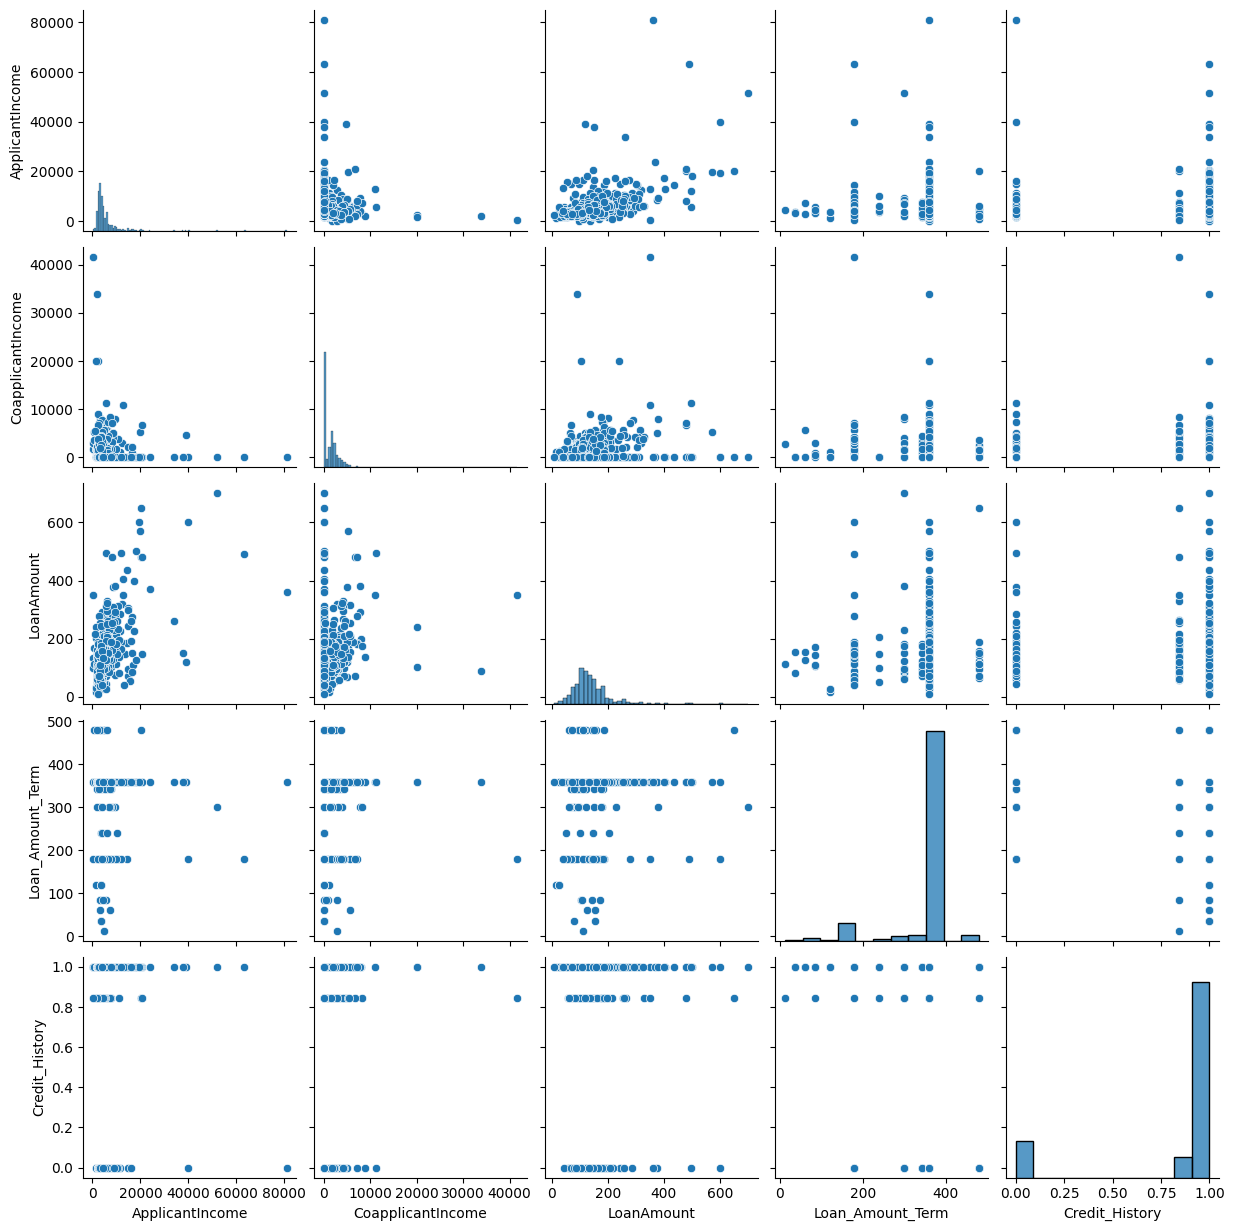

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)

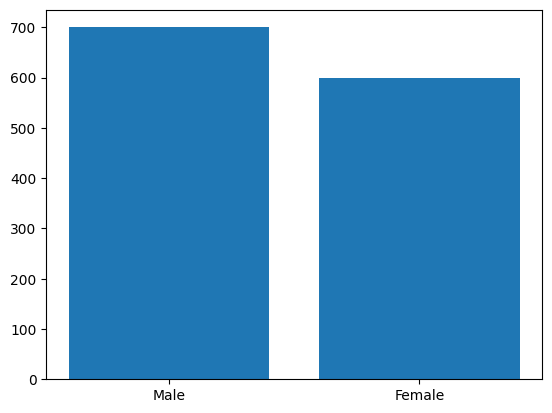

In [13]:
plt.bar(df['Gender'], df['LoanAmount'])
plt.show()

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

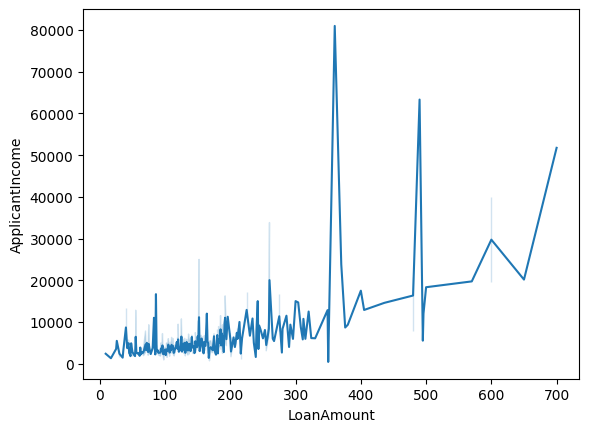

In [14]:
sns.lineplot(data = df, x = df['LoanAmount'], y = df['ApplicantIncome'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [16]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [17]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Married'] = df['Married'].map({'Yes':1, 'No':0})
df['Dependents'] = df['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})
df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].map({'No':1, 'Yes':0})
df['Property_Area'] = df['Property_Area'].map({'Semiurban':1, 'Urban':0,'Rural':2})
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [19]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

# 1. Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [23]:
from sklearn.metrics import accuracy_score

y_pred_lr = lr_model.predict(x_test)
accuracy_score(y_test, y_pred_lr)

0.7967479674796748

 Using GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV
c_values = list(range(1,21))
penalties = ['l1', 'l2']
param_grid = dict(C=c_values, penalty=penalties)

grid_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid, scoring = 'accuracy', cv=5)
grid_lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [25]:
grid_lr.best_params_

{'C': 1, 'penalty': 'l2'}

In [26]:
grid_lr.best_score_

0.8106369820655533

In [27]:
from sklearn.metrics import confusion_matrix

y_pred = grid_lr.predict(x_test)
confusion_matrix(y_test, y_pred)


array([[16, 23],
       [ 2, 82]])

# 2. Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
from sklearn.metrics import accuracy_score

y_pred_dt = dt_model.predict(x_test)
accuracy_score(y_test, y_pred_dt)

0.7154471544715447

Using GridSearchCV

In [30]:
parameter_dt = {'criterion': ['gini', 'entropy'],
             'max_depth': list(range(5,30,5)),
             'min_samples_leaf': list(range(10,100,10))}

grid_dt = GridSearchCV(estimator = dt_model, param_grid = parameter_dt, scoring = 'accuracy', cv = 5)
grid_dt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80,
                                              90]},
             scoring='accuracy')

In [31]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 30}

In [32]:
grid_dt.best_score_

0.8106575963718822

In [33]:
y_pred_dt = grid_dt.predict(x_test)
confusion_matrix(y_test, y_pred_dt)

array([[16, 23],
       [ 1, 83]])

#3. KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred_knn = model_knn.predict(x_test)
accuracy_score(y_test, y_pred_knn)

0.7642276422764228

Using GridSearchCV

In [36]:
parameter_knn = {'n_neighbors': list(range(5,75,5)),
             'weights': ['uniform', 'distance'],
             'leaf_size': list(range(10,100,10))}

grid_knn = GridSearchCV(estimator = model_knn, param_grid = parameter_knn, scoring = 'accuracy', cv =5)
grid_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                         'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                         55, 60, 65, 70],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [37]:
grid_knn.best_params_

{'leaf_size': 10, 'n_neighbors': 40, 'weights': 'distance'}

In [38]:
grid_knn.best_score_

0.8045557616986188

In [39]:
y_pred_knn = grid_knn.predict(x_test)
confusion_matrix(y_test, y_pred_knn)

array([[16, 23],
       [ 1, 83]])

#4. AdaBoost Classifier


In [40]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier()
model_ada.fit(x_train, y_train)

AdaBoostClassifier()

In [41]:
y_pred_ada = model_ada.predict(x_test)
accuracy_score(y_test, y_pred_ada)

0.8048780487804879

Using GridSearchCV

In [42]:
parameter_ada = {'n_estimators':list(range(1,100,10)),
                 'learning_rate':list(range(2,25,2))}

grid_ada = GridSearchCV(estimator = model_ada, param_grid = parameter_ada, scoring = 'accuracy', cv = 5)
grid_ada.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:604: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:604: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:604: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.10/dist-packa

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                           22, 24],
                         'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                          91]},
             scoring='accuracy')

In [43]:
grid_ada.best_params_

{'learning_rate': 2, 'n_estimators': 1}

In [44]:
grid_ada.best_score_

0.8106575963718822

In [45]:
y_pred_ada = grid_ada.predict(x_test)
confusion_matrix(y_test, y_pred_ada)

array([[16, 23],
       [ 1, 83]])

#5. Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
model_gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [47]:
y_pred_gb = model_gb.predict(x_test)
accuracy_score(y_test, y_pred_gb)

0.8048780487804879

Using GridSearchCV

In [48]:
parameter_gb ={'n_estimators': list(range(100,500,100)),
               'learning_rate': list(range(2,25,2))}

grid_gb = GridSearchCV(estimator = model_gb, param_grid = parameter_gb, scoring = 'accuracy', cv = 5)
grid_gb.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                           22, 24],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [49]:
grid_gb.best_params_

{'learning_rate': 6, 'n_estimators': 100}

In [50]:
grid_gb.best_score_

0.6616780045351474

In [51]:
y_pred_gb = grid_gb.predict(x_test)
confusion_matrix(y_test, y_pred_gb)

array([[23, 16],
       [81,  3]])